## Read me 
This notebook contains a script to read and plot the amplitude data for the three codes:
1. WavesWater.c
2. ViscousOilOnWater.c
3. IceOnWaterWaves.

## Packages and Functions

In [19]:
#Import relevant packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Use Latex and serif font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#Reads data from a file and separates columns into variables of time and Amplitude
def read_extract(dat_file):
    df = pd.read_csv(dat_file, sep=' ')
    df.head()
    nb_col = len(df.columns)
    
    if (nb_col==2):
        t = df.iloc[:, 0].to_numpy()
        Amp = df.iloc[:, 1].to_numpy()
        A0 = Amp[0]
        return A0, t, Amp
    
    else :
        t = df.iloc[:, 0].to_numpy()
        AmpOcean = df.iloc[:, 1].to_numpy()
        AmpIce = df.iloc[:, 2].to_numpy()
        A0_Ocean = AmpOcean[0]
        A0_Ice = AmpIce[0]
        return A0_Ocean, A0_Ice, t, AmpOcean, AmpIce

## Amplitude of single interface problem and comparison with Basilisk code 
plots the amplitude of an interface between air and ocean (WavesWater.c), and compares the amplitude with the basilisk code (gravity.c)

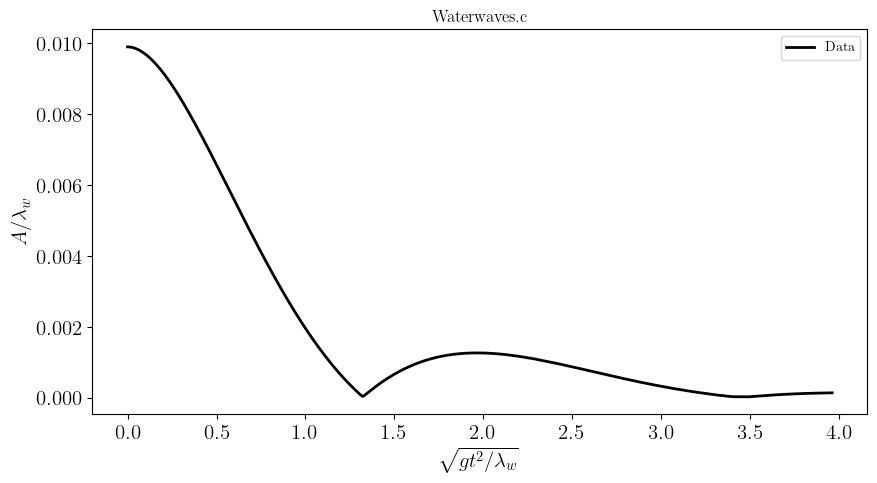

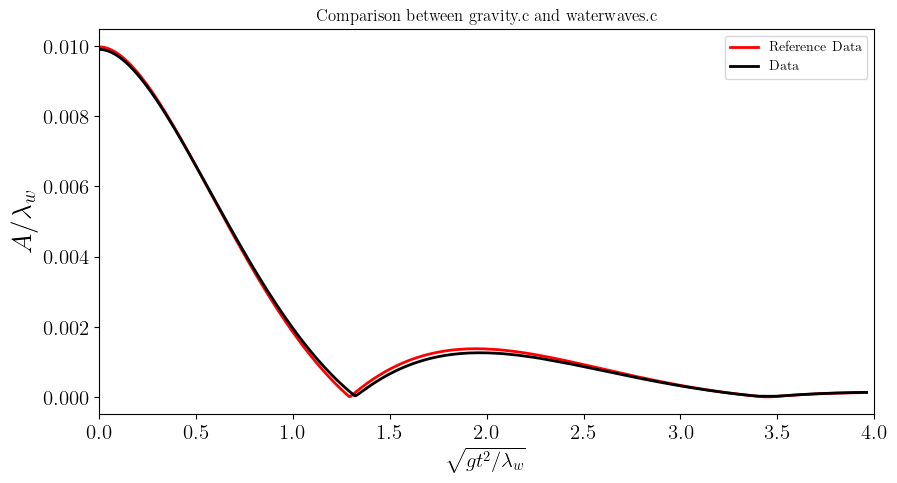

In [55]:
#Import data from Waterwaves.c and gravity.c
A0, t, Amp = read_extract('WavesWater_/amplitude.dat')
A0_ref, t_ref, Amp_ref = read_extract('amplitude.dat')

df = pd.read_csv('Prosperetti.dat', sep=' ')
t_Prosp = df.iloc[:, 1].to_numpy()
Amp_Prosp = df.iloc[:, 3].to_numpy()


#Amplitude of interface between air and ocean
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(t, Amp, 'k-', lw=2, label='Data')
ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlim([0., 4.0])
#ax.set_ylim([0., A0])
ax.legend()
plt.title("Waterwaves.c")
#plt.savefig("Amp_w")
plt.show()


#Comparison between amplitude of our code and reference code
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(t_ref, Amp_ref, 'r', lw=2, label='Reference Data')
#ax.plot(t_Prosp/16.032448313657, Amp_Prosp, 'b', lw=2, label='Reference Prosperetti Data')
ax.plot(t, Amp, 'k-', lw=2, label='Data')
ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$A/\lambda_w$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)#
ax.set_xlim([0., 4.0])
#ax.set_ylim([0., A0])
ax.legend()
plt.title("Comparison between gravity.c and waterwaves.c")
#plt.savefig("Comparison_gw_grid6_N128")
plt.show()

## Testing the height of the viscous oil layer

Using code from the water oil, I'm testing if the code by playing with the height of the oil layer.

In [ ]:
#Extracts amplitude data from ViscousOilOnWaterWaves.c
A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract('ViscousOilOnWaterWaves_/amplitude.dat')


#Plot
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(t, AmpOcean, 'k--', lw=2, label='Ocean layer')
ax.plot(t, AmpIce, 'r--', lw=2, label='Ice layer') 

ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim([0., 10])
#ax.set_ylim([0., A0])
ax.legend()
#plt.savefig("Oil layer Amplitude")
plt.show()

## Verifying if the ice sheet behaves as an elastic sheet
 I'm testing to see if the implementation of the elastic modulus is done correctly, to see if the sheet behaves elastically.

In [ ]:
#Extracts amplitude data from IceOnWaterWaves.c
A0_Ocean, A0_Ice, t, AmpOcean, AmpIce = read_extract('IceOnWaterWaves_/amplitude.dat')


#Plot
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(t, AmpOcean, 'k--', lw=2, label='Ocean layer')
ax.plot(t, AmpIce, 'r--', lw=2, label='Ice layer') 

ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=15)
ax.set_ylabel(r'$A/\lambda_w$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim([0., 10])
#ax.set_ylim([0., A0])
ax.legend()
#plt.savefig("Oil layer Amplitude")
plt.show()

#1. WARNING: CFL must be <= 0.5 for VOF (cfl - 0.5 = 0.00345565), problem with VOF according to code.
#2. Determine if elastic implementation idea is faulty or if there is just some silly bug in the code. 